In [2]:
from pydataset import data
import pandas as pd
import numpy as np

# Load the mpg dataset
mpg = data('mpg')

In [3]:
# On average, which manufacturer has the best miles per gallon?

# adding column that holds the average mpg between city and hwy
overall_mpg = mpg.assign(avg_mpg_overall = (mpg.cty + mpg.hwy) / 2)

# new dataframe with values grouped by manufacturer
# using dictionary to have pandas show the mean for overall mpg, city, and highway
group_mpg = overall_mpg.groupby('manufacturer').agg({'avg_mpg_overall':'mean','cty':'mean','hwy':'mean'})

# renaming city and highway columns to reflect that they contain averages
group_mpg.rename(columns = {'city': 'cty_average', 'hwy': 'hwy_average'}, inplace=True)

# Best city mileage 
# group_mpg.sort_values(by = ['city_average'], ascending = False).head(1)

# Best highway mileage
# group_mpg.sort_values(by = ['hwy'], ascending = False).head(1)

# Best overall mileage (city and highway combined)
group_mpg.sort_values(by = ['avg_mpg_overall'], ascending = False).head(1)


,avg_mpg_overall,cty,hwy_average
manufacturer,,,
honda,28.5,24.444444,32.555556


In [4]:
# How many different manufacturers are there?

# using agg and nunique to find number of different manufacturers 
mpg.manufacturer.agg('nunique')

# alternate answer
# len(mpg.manufacturer.unique())


15

In [5]:
# How many different models are there?

# using agg and nunique to find number of different models 
mpg.model.agg('nunique')

# alt answer
# len(mpg.manufacturer.unique())


38

In [6]:
# Do automatic or manual cars have better miles per gallon?

# creating new dataframe with overall average mpg per car as new column
automan = mpg.assign(avg_mpg_overall = (mpg.cty + mpg.hwy) / 2)

# new column transcat holds value of auto or manual
# if trans value starts with a, column will show auto, otherwise manual
automan['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')

# groupby transcat and use dictionary with agg to show avg: mpg overall, city, and highway
automan_comparison = automan.groupby('trans_cat').agg({'avg_mpg_overall':'mean','cty':'mean','hwy':'mean'})

# rename city and hway columns to reflect that they hold averages
automan_comparison.rename(columns = {'cty': 'city_average', 'hwy': 'hwy_average'}, inplace=True)

# display results 
automan_comparison

# Answer: manual transmissions give the best mpg for city, highway, and overall

,avg_mpg_overall,city_average,hwy_average
trans_cat,,,
auto,19.130573,15.968153,22.292994
manual,22.227273,18.675325,25.779221


In [7]:
# Copy the users and roles dataframes from the examples above. 

# copying users DF
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

# copying roles DF
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})


In [8]:
# What do you think a right join would look like? 

# using how = right to show a right join
pd.merge(users, roles, left_on = 'role_id', right_on='id', how = 'right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [9]:
# What do you think an outer join would look like? 

# using how = outer to show a right join
pd.merge(users, roles, left_on = 'role_id', right_on='id', how = 'outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [10]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?

# dropping foreign key, role_id
users = users.drop(columns = ['role_id'])

# attempting to merge again
pd.merge(users, roles, left_on = 'role_id', right_on='id')

# Answer: error message "key error role_id" appears since there is no id column to merge on

KeyError: 'role_id'

In [11]:
# Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

# creating function that will return a URL to connect to SQL database
def get_db_url(db):
    # importing host, username, and password from external file
    from env import host, username, password
    # setting variable equal to string that will combine the host, username, password, and db for our URL
    url = (f'mysql+pymysql://{username}:{password}@{host}/{db}')
    # return the URL that is created
    return (url)


In [12]:
# Use your function to obtain a connection to the employees database.

# using read_sql to run query
# using function we created to establish connection
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url('employees'))


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [13]:
# Intentionally make a typo in the database url. What kind of error message do you see?

# new function with incorrect URL begining 
def url_typo(un, hst, pw, db):
    url = (f'ZZZmysql+pymysql://{username}:{password}@{host}/{db}')
    return (url)

# attempting to connect again
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url_typo(username, host, password, 'employees'))

# Answer: NoSuchModuleError: Can't load plugin: sqlalchemy.dialects

NameError: name 'username' is not defined

In [14]:
# Intentionally make an error in your SQL query. What does the error message look like?

# attempting to connect again with typo in query
pd.read_sql('ZZZSELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url(username, host, password, 'employees'))

# Answer: ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax;

NameError: name 'username' is not defined

In [16]:
# Read the employees and titles tables into two separate dataframes

# reading employees table into dataframe
employees = pd.read_sql('SELECT * FROM employees', get_db_url('employees'))

# reading employees table into dataframe
titles = pd.read_sql('SELECT * FROM titles', get_db_url('employees'))

Text(0.5, 0, 'Number of employees')

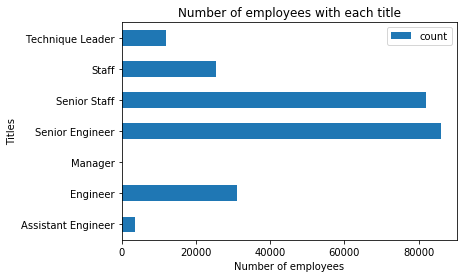

In [17]:
# Visualize the number of employees with each title.

# importing matplotlib with alias plt
import matplotlib.pyplot as plt

# creating dataframe that holds current titles by filtering for title to_dates that are equal to today or later via to_datetime
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 

# grouping by title and counting employee number per title
counting_cur_titles = current_titles.groupby('title').emp_no.agg(['count'])

# display results as horizontal bar graph
# each bar represents a different title
# the x axis displays the amount of employees that currently have a title
counting_cur_titles.plot.barh()

# labeling title
plt.title('Number of employees with each title')

# labeling x and y axis
plt.ylabel('Titles')
plt.xlabel('Number of employees')

In [18]:
# Join the employees and titles dataframes together.

# mergin the employees and titles DFs together via inner join
pd.merge(employees, titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


Text(0.5, 0, 'Amount of Employees')

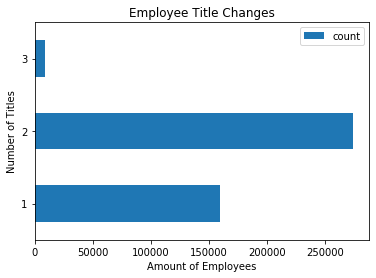

In [19]:
# Visualize how frequently employees change titles.

# grouping titles by emp_no and counting title per employee number
# this dataframe shows how many titles have been held by each employee
agg_emp_titles = titles.groupby('emp_no').title.agg(['count'])

# merging titles table with agg_emp_titles DF
agg_emp_titles = pd.merge(titles, agg_emp_titles, left_on = 'emp_no', right_on = 'emp_no')

# grouping counts (1,2,3) and counting the amount of employee numbers per count
agg_emp_titles_group = agg_emp_titles.groupby('count').emp_no.agg(['count'])

# creating variable that holds horizontal bargraph displaying the number of titles that each
# employee has had (all employees, not just current)
title_changes_graph = agg_emp_titles_group.plot(kind = 'barh')

# display graph
title_changes_graph


# labeling title
plt.title('Employee Title Changes')

# plot x and y labels
plt.ylabel('Number of Titles')
plt.xlabel('Amount of Employees')


In [20]:
# For each title, find the hire date of the employee that was hired most recently with that title.

# creating DF that holds current titles for employees found via filtering for to_date values equal to or greater than todays date via to_datetime
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 

# merging employees and current_titles tables via inner join
titles_emps = pd.merge(employees, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')

# grouping values by title and filtering for the latest hire date among current employees for each position
recent_hires = titles_emps.groupby('title').hire_date.agg(['max'])

# display results
recent_hires

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-23
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-15


In [22]:
# Write the code necessary to create a cross tabulation of the number of titles by department. 
# (Hint: this will involve a combination of SQL and python/pandas code)

# reading dept_emp table into DF. we will need this so we can connect dept names with titles
dept_emp = pd.read_sql('SELECT * FROM dept_emp', get_db_url('employees'))
# reading departments table into DF. we will need this so we can see department names instead of just dept numbers
depts = pd.read_sql('SELECT * FROM departments', get_db_url('employees'))

# creating DF that only holds employees with to_date equal to today or later via to_datetime (ie. current employee departments)
current_dept = dept_emp[dept_emp['to_date'] >= pd.to_datetime('today')]
# creating DF that only holds titles with to_date equal to today or later via to_datetime (ie. current employee titles)
current_titles = titles[titles['to_date'] >= pd.to_datetime('today')] 

# merging via inner join the current department DF with departments DF (no date filtering needed for departments since there are no dates in that table)
depts_and_dept_emps = pd.merge(current_dept, depts, left_on = 'dept_no', right_on = 'dept_no', how = 'inner')
# merging the current titles DF with the previous DF via inner join
titles_depts = pd.merge(depts_and_dept_emps, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')

# creating crosstab for dept_name and titles
titles_depts_xtab = pd.crosstab(titles_depts.dept_name, titles_depts.title)

# displaying results
titles_depts_xtab


title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


In [24]:
# Use your get_db_url function to help you explore the data from the chipotle database. 

# using get_db_url to explore to chipotle database
chipotle = pd.read_sql('SELECT * FROM orders', get_db_url('chipotle'))

# display results
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [25]:
# What is the total price for each order?

# creating DF with original chipotle DF that includes a column with the item price as a float with no $
# this will allow us to perform mathematical operations on the values within the column
chipotle_money = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))

# creating DF using groupby and aggregate sum 
# the values are goruped by order_id so there is 1 row per order
# sum is used to add the price of each item in the order 
# combined this allows us to see the total price of each order
total_price = chipotle_money.groupby('order_id').money_price.agg(['sum'])

# display results
total_price

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [26]:
# What are the most popular 3 items?

# creating new DF that groups each item by name
# aggregate sum counts the amount of items in the quantity column for each item
# combined this allows us to see what the most popular items are
chipotle_item_counts = chipotle.groupby('item_name').quantity.agg(['sum'])

# display results using nlargest to sort the rows with the largest values at the top, set to keep all and 3 specifies that we want the first 3 values, ie. the 3 largest
chipotle_item_counts.nlargest(3, 'sum', keep='all')


,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


In [27]:
# Which item has produced the most revenue?

# creating DF with original chipotle DF that includes a column with the item price as a float with no $
# this will allow us to perform mathematical operations on the values within the column
chipotle_money = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))

# using groupby item name to give each item name row
# using agg sum on the new price column to get the total amount spent on each item
# used together, this will show the total amount spent on these item types, grouped by item name
chipotle_item_revenue = chipotle_money.groupby('item_name').money_price.agg(['sum'])

# using nlargest to sort list by largest amounts, specifying 1 as the first argument so that only the largest value is filtered
chipotle_item_revenue.nlargest(1, 'sum', keep='all')


,sum
item_name,
Chicken Bowl,7342.73
